In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4
import random

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')
from scipy.stats import hypergeom


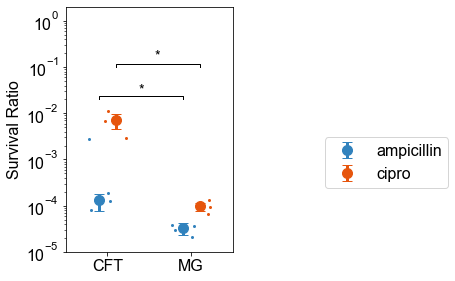

In [2]:
table = pd.read_csv('source_data/included/CFT_survival.csv',sep=',',index_col=0)
table = table.loc[(table.index=='20230928') | (table.index=='20230926_petri')]
cm = plt.cm.get_cmap('tab20c')
np.random.seed(seed=2)
shift = 0.05
strain_list = ['CFT','MG']
names = ['CFT','MG']
fig,ax = plt.subplots(figsize=(3,4.5))
i = 1

x = np.arange(1,3,1)
y = table.drop('20230926_petri').groupby(['strain'])['amp survival'].mean()[strain_list]
err = table.drop('20230926_petri').groupby(['strain'])['amp survival'].std()[strain_list]
ax.errorbar(x-0.1,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(0),label='ampicillin')
y1 = table.loc[table['strain']=='CFT','amp survival'].dropna()
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([0.9 + i for i in l],y1,s=4,color=cm(0))

y1 = table.loc[table['strain']=='MG','amp survival'].dropna()
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([1.9 + i for i in l],y1,s=4,color=cm(0))

y = table.groupby(['strain'])['cipro survival'].mean()[strain_list]
err = table.groupby(['strain'])['cipro survival'].std()[strain_list]/np.sqrt(table.groupby(['strain'])['cipro survival'].count()[strain_list])
ax.errorbar(x+0.1,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(4),label='cipro')
y1 = table.loc[table['strain']=='CFT','cipro survival'].dropna()
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([1.1 + i for i in l],y1,s=4,color=cm(4))
y1 = table.loc[table['strain']=='MG','cipro survival'].dropna()
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.09,0.14)) for i in range(0,len(y1))]
ax.scatter([2.1 + i for i in l],y1,s=4,color=cm(4))

ax.set_yscale('log')
ax.set_ylim(10**(-5),10**0.3)
ax.set_xlim(0.5,2.5)
ax.set_xticks([1,2])
ax.set_xticklabels(names)
ax.legend(bbox_to_anchor=(1.5, 0.5),fontsize=16)
ax.set_ylabel('Survival Ratio')

x1 = 0.9
x2 = 1.9
y = 0.02
h = 0.004
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.002, "*", ha='center', va='bottom', color='k',size=14)

x1 = 1.1
x2 = 2.1
y = 0.1
h = 0.02
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.002, "*", ha='center', va='bottom', color='k',size=14)

plt.savefig('figures/figED6a_survival.pdf')

In [3]:
x = table.loc[table['strain']=='CFT']['amp survival']
y = table.loc[table['strain']=='MG']['amp survival']
print(x.mean()/y.mean())
print(st.mannwhitneyu(x,y))

x = table.loc[table['strain']=='CFT'].drop('20230926_petri')['amp survival']
y = table.loc[table['strain']=='MG'].drop('20230926_petri')['amp survival']
print(x.mean()/y.mean())
print(st.mannwhitneyu(x,y))

25.03299368088468
MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
4.0517494824016556
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)


In [4]:
x = table.loc[table['strain']=='CFT']['cipro survival'].dropna()
y = table.loc[table['strain']=='MG']['cipro survival'].dropna()
print(x.mean()/y.mean())
print(st.mannwhitneyu(x,y))


72.0134895570803
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)


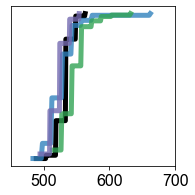

In [5]:
# appearance times #

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)
appearance_times = appearance_times.loc[appearance_times.index.str.contains('20230924|20240115|20230929|20230911|20240118')]

samples = {}
samples['WT'] = list(appearance_times.index[appearance_times.index.str.contains('MG')].unique())
samples['WT'] = samples['WT'] + ['35-1_20230323','35-2_20230323','35-3_20230323','35-4_20230323','WT_1day_20220421','noTet1_20211115', 'noTet2_20211115', 'noTet3_20211115','wt_20221104','wt_20220829','MG1655_20220922']
samples['CFT'] = list(appearance_times.index[appearance_times.index.str.contains('CFT')].unique())

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

colors = [cm(0),cm(8),cm(12)]
xmin = 450
xmax = 700
alpha = 1
fig, ax = plt.subplots(figsize=(3,3))
i=0
for t in ['noTet3_20211115'] + ['CFT1_20230929'] + ['CFT2_20230929'] + ['CFT1_20240115']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    if i >= 1:
        ax.plot(bins_count[1:], cdf,linewidth=5,color=colors[i-1],label='CFT',alpha=0.8)
    else:
        ax.plot(bins_count[1:], cdf,linewidth=5,color='k',alpha=1,label='MG1655')
    ax.set_yticks([])
    ax.set_xticks([500,600,700])
    ax.set_xlim([xmin,xmax])
    i += 1
    
plt.tight_layout()

plt.savefig('figures/figED6b_cdf.pdf')

In [6]:
all_df = pd.DataFrame()
for s_type in samples.keys():
    for sample in samples[s_type]:
        df = appearance_times.loc[sample]
        df = df.reset_index().drop('tp',axis=1)
        df.columns = [sample]
        all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/figED6b.csv')

MannwhitneyuResult(statistic=111.0, pvalue=0.4128669612687142)
MannwhitneyuResult(statistic=71.0, pvalue=0.03325199895559446)
13
18


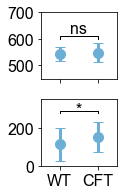

In [7]:
# statistics

## define function to get mean of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
## make dictionary of mean appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
to_plot = ['WT','CFT']

## test significant differences in mean appearance times ##
print(st.mannwhitneyu(s_func['WT'],s_func['CFT']))

## plot means ##
fig,(ax,ax2) = plt.subplots(2,1,figsize=(2,3),sharex=True)
x = np.arange(0,len(to_plot))
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))

## define function to get range of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
## make dictionary of range of appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))

## test significant differences in range of appearance times ##
print(st.mannwhitneyu(s_func['WT'],s_func['CFT']))

## plot ranges ##

means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax2.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))
ax2.set_xlim(-0.5,1.5)
ax2.set_xticks([0,1])
names = ['WT','CFT']
ax2.set_xticklabels(names)
ax.set_ylim(450,700)
ax2.set_ylim(0,350)
## add significance to plot ##
x1 = 0
x2 = 1
y = 600
h = 10
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=16)

x1 = 0
x2 = 1
y = 280
h = 10
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+h-30, "*", ha='center', va='bottom', color='k',size=16)

plt.tight_layout()
plt.savefig('figures/figED6b_stats.pdf')

print(len(samples['CFT']))
print(len(samples['WT']))


In [8]:
## first run v4_CFT_markers.R and figED2_markers_vs_clust5.R

bnum_table = pd.read_csv('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t',index_col=0)
bnum_table = bnum_table.drop_duplicates()
bnum_table.index = bnum_table['gene']

def make_table(filename,FDR):
    table = pd.read_csv(filename,sep='\t',index_col=0)
    table.index = table['Row.names']
    table = table.drop('Row.names',axis=1)
    table = table.merge(bnum_table,left_index=True,right_index=True,how='left')
    table['less'] = -table['less']
    signed_p = []
    for h,l in zip(table['greater'],table['less']):
        if abs(h)<=abs(l):
            signed_p.append(h + (10**-280))
        elif abs(l)<abs(h):
            signed_p.append(l - (10**-280))
        else:
            print('error')
    table['signed_p'] = signed_p
    table['fixed_signif'] = (abs(table['signed_p']).sort_values()<FDR*np.arange(1,len(table)+1)/len(table)).astype(int)
    table['fixed_signif'] = (table['fixed_signif'] * (table['signed_p']/abs(table['signed_p']))).astype(int)
    return table

tables = {}
FDR = 0.01
tables['CFT_amp'] = make_table('source_data/generated/v4_CFTamp_vs_CFT1hr.txt',FDR) 
tables['metG_clust2'] = make_table('source_data/generated/v4_metG_clust2_vs_5.txt',FDR)
tables['wt_amp']  = make_table('source_data/generated/v4_wt_amp_vs_5.txt',FDR)
tables['tet'] = make_table('source_data/generated/v4_tet_vs_5.txt',FDR)
tables['stat'] = make_table('source_data/generated/v4_clust1_vs_5.txt',FDR)

counts = {}
counts['metG_clust2'] = pd.read_csv('source_data/generated/v4_metG_clust2_vs_5_counts.txt',sep='\t')
counts['CFT_amp'] = pd.read_csv('source_data/generated/v4_CFTamp_vs_CFT1hr_counts.txt',sep='\t')
counts['metG_clust2'] = pd.read_csv('source_data/generated/v4_metG_clust2_vs_5_counts.txt',sep='\t')
counts['wt_amp'] = pd.read_csv('source_data/generated/v4_wt_amp_vs_5_counts.txt',sep='\t')
counts['tet'] = pd.read_csv('source_data/generated/v4_tet_vs_5_counts.txt',sep='\t')
counts['stat'] = pd.read_csv('source_data/generated/v4_clust1_vs_5_counts.txt',sep='\t')


135
3.20210754632946
cysK
2.8729621183314102


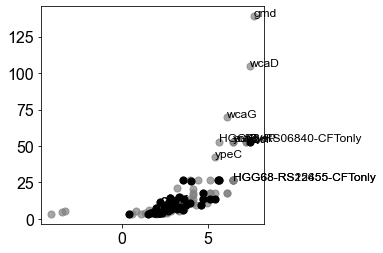

In [9]:
fig,ax = plt.subplots(figsize=(4,4))
cm = plt.cm.get_cmap('Accent')

s1 = 'CFT_amp'
s2 = 'metG_clust2'

df = tables[s1]
df = df.merge(counts[s1].loc[counts[s1].min(axis=1)>0],how='inner',left_index=True,right_index=True).drop(['bulk.1','bulk.2'],axis=1)
archive_df = df.copy()
df = df.loc[df['fixed_signif']!=0]

x = df['logFC']
y = -np.log10(abs(df['signed_p']))
ax.scatter(x,y,s=50,color='grey',alpha=0.7)
print(len(x))
print(x.median())

gene_set = df.sort_values('greater',ascending=True).iloc[0:12,].index
for gene in gene_set:
    ax.annotate(gene, (x[gene],y[gene]),size=12)
gene_set_2 = tables[s2].sort_values('greater').index[0:12]
for gene in gene_set_2:
    if gene in x.index:
        ax.annotate(gene, (x[gene],y[gene]),size=12,weight='bold')
        print(gene)
pd.DataFrame(archive_df['fixed_signif'].values+1,index=archive_df['bnum']).sort_values(0).to_csv('source_data/generated/' + s1 + '_FDR0.01_discrete_vs_5.txt',sep='\t')

df = df.reindex(tables[s2].loc[tables[s2]['fixed_signif']==1].index).dropna()
x = df['logFC']
y = -np.log10(abs(df['signed_p']))
ax.scatter(x,y,s=50,color="k",alpha=1,label=s1 + ' only')
print(x.median())

plt.savefig('figures/figED6k_CFT_amp_volcano.pdf')

In [10]:
## save source data
for_table = pd.DataFrame()
for key in ['CFT_amp']:
    temp = tables[key][['logFC','signed_p','fixed_signif']]
    temp.insert(3,"type",[key] * len(temp),True)
    for_table = for_table.append(temp)
for_table.to_csv('source_data/source_tables/figED6.txt',sep='\t')

In [11]:
gene_set

Index(['gmd', 'wcaD', 'wcaG', 'HGG68-RS06840-CFTonly', 'ynfG', 'eutR', 'cysP',
       'wzc', 'yjbH', 'ypeC', 'HGG68-RS15655-CFTonly',
       'HGG68-RS22455-CFTonly'],
      dtype='object')

In [12]:
### get all p-values (hyper-geometric test) ###
def get_p(s1,s2):
    df = tables[s1].reindex(labels=tables[s1].merge(tables[s2],left_index=True,right_index=True,how='inner').index).dropna()
    archive_df = df.copy()
    df = df.loc[df['fixed_signif']!=0]
    df = df.reindex(tables[s2].loc[tables[s2]['fixed_signif']==1].index).dropna()
    M = len(archive_df)             # population size
    n = (archive_df['fixed_signif']==1).sum()  # number of successes in population
    N = (tables[s2].reindex(archive_df.index).dropna()['fixed_signif']==1).sum()  # number sampled
    x = (df['fixed_signif']==1).sum()  # number of drawn successes
    print(hypergeom.sf(x-1, M, n, N))

s1 = 'CFT_amp'
s2 = 'metG_clust2'
get_p(s1,s2)
s2 = 'tet'
get_p(s1,s2)


0.0005433325722764427
0.0026681282483049834


In [13]:
## read in aggregated iPAGE output ## 
## run ipage P.1 ##
combined = pd.read_csv('source_data/included/discrete_vs_5_pvmatrix_combined.txt',sep='\t',index_col=0)
## clean up dataframe and make parsable ##
combined['comparison'] = combined.index.str.split('_FDR0.01_discrete',expand=True).droplevel(1)
combined['type'] = combined.index.str.split('_PO_',expand=True).droplevel(0).str.split('_P.1_PAGE',expand=True).droplevel(1)
combined = combined.reset_index().drop('index',axis=1)
for column in ['0','1','2']:
    combined = combined.merge(combined[column].str.split('/',expand=True).rename(columns={0:column+'_pval_enriched',1:column+'_pval_depleted'}).astype(float),left_index=True,right_index=True)
combined = combined.drop(['0','1','2'],axis=1)
## resulting combined dataframe gives p-value (from iPAGE) of enrichment or depletion in each gene classification ##
## gene classifications are 0 (significantly underexpressed), 1 (not differentially expressed), 2 (significantly overexpressed) ##


In [14]:
df = combined.loc[(combined['comparison']=='CFT_amp') & (combined['2_pval_enriched']<np.log10(0.01))].sort_values('2_pval_enriched')
terms = df['GO']
genes_df = pd.DataFrame()
for term in terms:
    term = term.split(' ')[0]
    genes = []
    for term_type in ['go','tf','sr']:
        ref_file = open('source_data/included/Ecoli_' + term_type + '_index.txt')
        for line in ref_file:
            if term in line:
                genes.append(line.split('\t')[0])
    genes_df = genes_df.merge(pd.DataFrame([1]*len(genes),genes,columns=[term]),left_index=True,right_index=True,how='outer')
genes_df = genes_df.fillna(0)
genes_df.loc[genes_df['IHF_Up']>0].sum()
df


,GO,comparison,type,0_pval_enriched,0_pval_depleted,1_pval_enriched,1_pval_depleted,2_pval_enriched,2_pval_depleted
942,GO:0009103 lipopolysaccharide biosynthetic pro...,CFT_amp,go,-0.0,-0.026,-0.0,-3.734,-3.816,-0.0
975,IHF_Up IHF_Up,CFT_amp,tf,0.0,0.000,-0.0,-2.460,-2.460,-0.0
945,GO:0009086 methionine biosynthetic process,CFT_amp,go,0.0,-0.005,-0.0,-2.307,-2.337,0.0
946,GO:0050662 coenzyme binding,CFT_amp,go,0.0,-0.005,-0.0,-2.307,-2.337,0.0


In [15]:
df = combined.loc[(combined['comparison']=='CFT_amp') & (combined['0_pval_enriched']<np.log10(0.05))].sort_values('2_pval_enriched')
terms = df['GO']
genes_df = pd.DataFrame()
for term in terms:
    term = term.split(' ')[0]
    genes = []
    for term_type in ['go','tf','sr']:
        ref_file = open('source_data/included/Ecoli_' + term_type + '_index.txt')
        for line in ref_file:
            if term in line:
                genes.append(line.split('\t')[0])
    genes_df = genes_df.merge(pd.DataFrame([1]*len(genes),genes,columns=[term]),left_index=True,right_index=True,how='outer')
genes_df = genes_df.fillna(0)

df

,GO,comparison,type,0_pval_enriched,0_pval_depleted,1_pval_enriched,1_pval_depleted,2_pval_enriched,2_pval_depleted
960,GO:0005525 GTP binding,CFT_amp,go,-1.376,-0.0,-0.148,-0.229,-0.06,-0.373
938,GO:0006412 translation,CFT_amp,go,-1.769,0.0,-3.068,-0.000,-0.00,-4.620
947,GO:0003746 translation elongation factor activity,CFT_amp,go,-2.113,-0.0,-0.013,-0.503,-0.00,-0.160
948,GO:0006414 translational elongation,CFT_amp,go,-2.113,-0.0,-0.013,-0.503,-0.00,-0.160
949,GO:0003924 GTPase activity,CFT_amp,go,-1.637,-0.0,-0.140,-0.168,-0.00,-0.482
